## 画像を読み込み，任意のサイズにリサイズして
## Numpy型のリストでPickleを使ってdumpするプログラム

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# python2, python3の互換性のためのおまじない
from __future__ import print_function

import os
import copy
import numpy as np
import pandas as pd
from PIL import Image
import six.moves.cPickle as pickle

# jupyterで画像を表示するためのおまじない
%matplotlib inline
import matplotlib.pyplot as plt

### ディレクトリに存在する画像群のパスを教師ラベルと共にCSVにdumpする

In [2]:
#valiables
beer_dir = "./img/beer/"
happou_dir = "./img/happoshu/"

beer_list = [["./img/beer/"+str(f), 0] for f in os.listdir(beer_dir)]
happou_list = [["./img/happoshu/"+str(f), 1] for f in os.listdir(happou_dir)]

# ここで2つのリストを結合させて1つのリストにしておくと次の処理で楽．beer_csv.append(papou_list)で良いかな？
all_imgs_list = copy.deepcopy(beer_list)
all_imgs_list.extend(happou_list)

# list to dataframe
all_img_csv = pd.DataFrame(all_imgs_list)

# dump dataframe to a csv file
all_img_csv.to_csv("./all_img.csv", header=False, index=False)

### CSVから画像のパスを読み込み，リサイズした画像をNumpy型のリストにぶち込む
### 作成したshape(a number of images, hight, width, channel)のリストを255.で割り平均0.5のデータセットに正規化

In [3]:
def get_dataset(data_list, target_size):
    csv_data = pd.read_csv(data_list, header=None)
    data = np.asarray([np.asarray(Image.open(csv_data[0][i], 'r').convert('RGB').resize((target_size[0], target_size[1])))\
                       for i in range(len(csv_data))]).astype(np.float32)
    target = np.asarray([csv_data[1][i] for i in range(len(csv_data))]).astype(np.int32)
    data /= 255.
    return data, target

### 実際に画像を読み込んでdumpしてみる

In [4]:
# all_img.csvに保存された画像群を読み込み(32, 32)サイズでリサイズしてnumpy型のリストとして取得
data_list = "./all_img.csv"
data, target = get_dataset(data_list, (32, 32))

# dictionary型で保存
dataset = {'data': data, 'target': target}

# pickleを使って作成したnumpy型のdata, targetを要素にもつdatasetをdump
pickle.dump(dataset, open('all_imgs_dic.pkl', 'wb'), -1)

### 複数の画像をまとめて出力する関数

In [5]:
def plot_imgs(imgs):
    """画像群をプロット
    引数：numpy.ndarray型のタプル
    返値：なし
    """
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(imgs)):
        ax = fig.add_subplot(10, 10, i+1)
        plt.tick_params(labelbottom='off')
        plt.tick_params(labeltop='off')
        plt.tick_params(labelleft='off')
        plt.tick_params(labelright='off')
        plt.imshow(imgs[i], interpolation='nearest', cmap='Greys_r')

### 正しく画像を読み込めているか確認してみる

dataset.shape (659, 32, 32, 3)


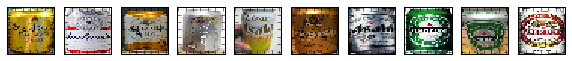

In [6]:
print("dataset.shape", dataset['data'].shape)
N = 10
shuffled_dataset = np.random.permutation(dataset['data'])
sample_imgs = [shuffled_dataset[idx] for idx in range(N)]
plot_imgs(sample_imgs)